In [53]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [114]:
df = web.DataReader('SBER', 'moex', start = '2019-01-01', end = '2023-12-28')
df

<ipython-input-114-a7d3d19fa44a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = web.DataReader('SBER', 'moex', start = '2019-01-01', end = '2023-12-28')


,ACCINT,ADMITTEDQUOTE,ADMITTEDVALUE,BEICLOSE,BID,BOARDID,BOARDNAME,BUYBACKDATE,CBRCLOSE,CLOSE,...,TRENDWAPPR,TYPE,VALUE,VOLUME,WAPRICE,WAVAL,YIELDATWAP,YIELDCLOSE,YIELDLASTCOUPON,YIELDTOOFFER
TRADEDATE,,,,,,,,,,,,,,,,,,,,,
2019-01-03,NaN,186.99,7.606839e+09,NaN,NaN,TQBR,NaN,NaN,NaN,186.99,...,NaN,NaN,7.606839e+09,40249190.0,188.97,NaN,NaN,NaN,NaN,NaN
2019-01-04,NaN,190.99,6.178983e+09,NaN,NaN,TQBR,NaN,NaN,NaN,190.99,...,NaN,NaN,6.178983e+09,32583360.0,189.64,NaN,NaN,NaN,NaN,NaN
2019-01-08,NaN,191.24,7.439748e+09,NaN,NaN,TQBR,NaN,NaN,NaN,191.24,...,NaN,NaN,7.439748e+09,38856560.0,191.48,NaN,NaN,NaN,NaN,NaN
2019-01-09,NaN,197.00,1.379375e+10,NaN,NaN,TQBR,NaN,NaN,NaN,197.00,...,NaN,NaN,1.379375e+10,70707820.0,195.08,NaN,NaN,NaN,NaN,NaN
2019-01-10,NaN,196.75,1.107213e+10,NaN,NaN,TQBR,NaN,NaN,NaN,196.75,...,NaN,NaN,1.107213e+10,56378780.0,196.39,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,NaN,NaN,NaN,NaN,NaN,TQBR,NaN,NaN,NaN,271.30,...,NaN,NaN,1.586613e+10,58724860.0,270.20,0.0,NaN,NaN,NaN,NaN
2023-12-25,NaN,NaN,NaN,NaN,NaN,TQBR,NaN,NaN,NaN,271.08,...,NaN,NaN,1.037392e+10,38115690.0,272.17,0.0,NaN,NaN,NaN,NaN
2023-12-26,NaN,NaN,NaN,NaN,NaN,TQBR,NaN,NaN,NaN,271.90,...,NaN,NaN,6.150169e+09,22658320.0,271.28,0.0,NaN,NaN,NaN,NaN


In [115]:
df = df[['HIGH','LOW','OPEN','CLOSE','VOLUME']]
df

,HIGH,LOW,OPEN,CLOSE,VOLUME
TRADEDATE,,,,,
2019-01-03,191.50,186.00,186.37,186.99,40249190.0
2019-01-04,190.99,187.77,188.00,190.99,32583360.0
2019-01-08,193.18,190.37,191.65,191.24,38856560.0
2019-01-09,197.00,192.10,192.71,197.00,70707820.0
2019-01-10,197.64,195.03,196.25,196.75,56378780.0
...,...,...,...,...,...
2023-12-22,271.90,265.37,266.06,271.30,58724860.0
2023-12-25,273.85,270.05,271.72,271.08,38115690.0
2023-12-26,272.89,270.00,271.00,271.90,22658320.0


In [116]:
df = df.dropna()
df.shape[0]

1244

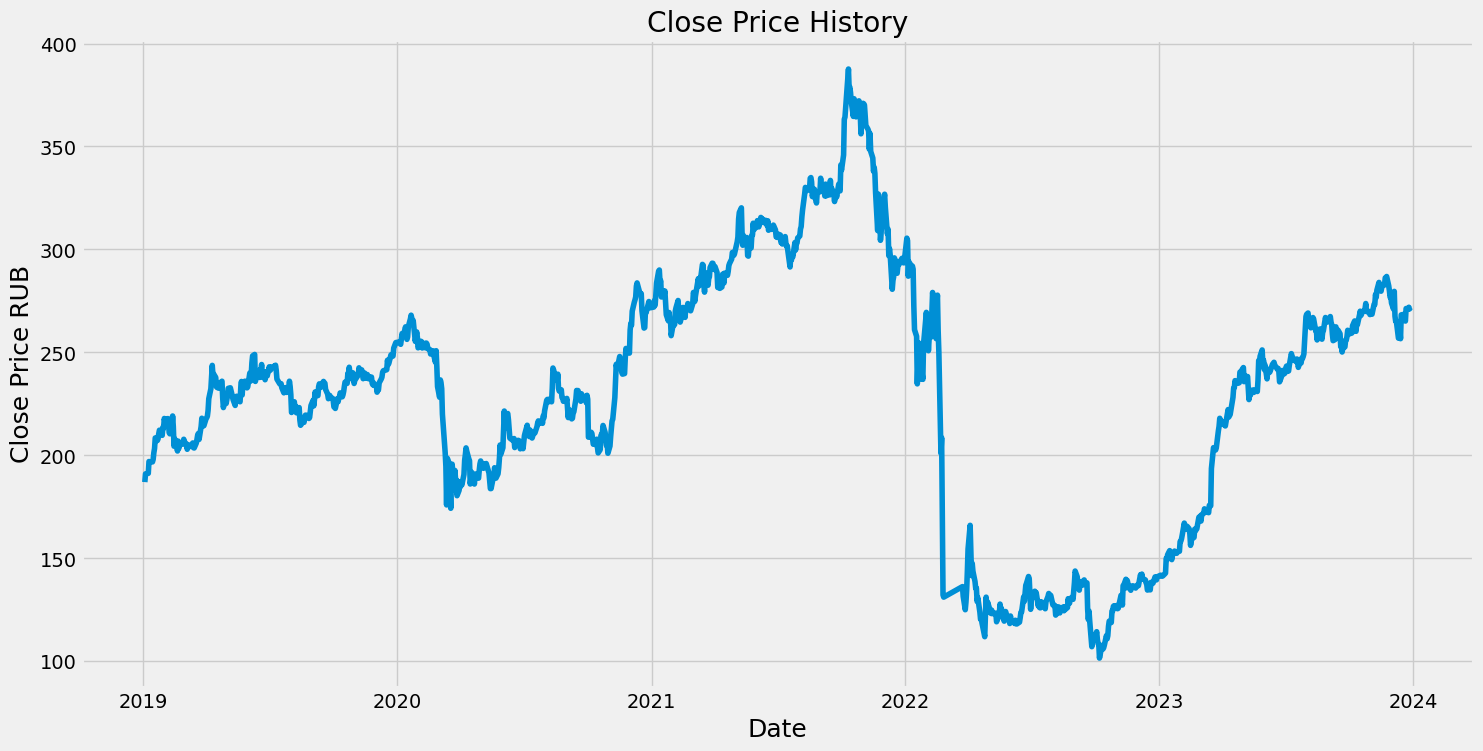

In [117]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['CLOSE'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price RUB', fontsize=18)
plt.show()

In [118]:
data = df.filter(['CLOSE'])
dataset = data.values
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

996

In [121]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [122]:
#Create the training dataset
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.2988116 , 0.31279273, 0.31366655, 0.33379937, 0.33292555,
       0.33310031, 0.33310031, 0.33729465, 0.34868927, 0.35588955,
       0.37378539, 0.36934638, 0.3720727 , 0.38063614, 0.38692765,
       0.38622859, 0.37818944, 0.39185599, 0.39021321, 0.40685075,
       0.40122335, 0.39846208, 0.40667599, 0.40227193, 0.38276826,
       0.380741  , 0.39321915, 0.41104509, 0.39286963, 0.35976931,
       0.37224747, 0.35893044, 0.3515554 , 0.3683677 , 0.35620412,
       0.36263544, 0.36476756, 0.36455785, 0.36315973, 0.37154841,
       0.36714436, 0.36350926, 0.35449144, 0.36176162, 0.35809158,
       0.36263544, 0.36211115, 0.3652569 , 0.35707794, 0.35669346,
       0.36490738, 0.37119888, 0.37853897, 0.38137015, 0.37119888,
       0.39321915, 0.40720028, 0.39356868, 0.39695911, 0.39468717])]
[0.4061516952114645]



In [123]:
#Cjnvert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [124]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(936, 60, 1)

In [125]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [126]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [127]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

936/936 [==============================] - 35s 34ms/step - loss: 0.0033


In [128]:
#Create the testing dataset
#Create a new array containing scaled values from index .....
test_data = scaled_data[training_data_len - 60: , : ]
#Create the data sets x_testand y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [129]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [130]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [131]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

8/8 [==============================] - 1s 18ms/step


In [132]:
#Get the RMSE
rmse = np.sqrt(np.mean( predictions - y_test) ** 2)
rmse

4.054687354795394

<ipython-input-133-55b6c952c312>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


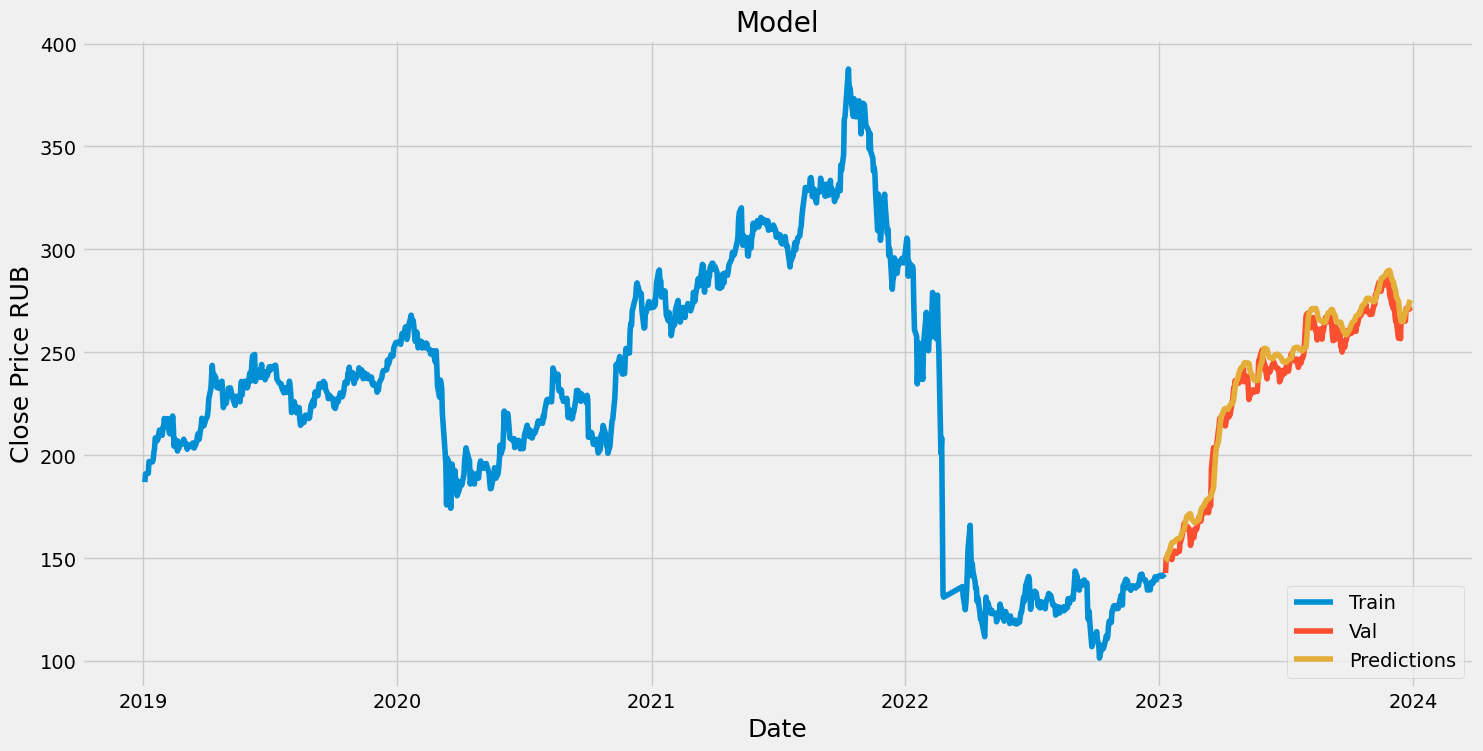

In [133]:
#Plot the date
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Vilusualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price RUB', fontsize=18)
plt.plot(train['CLOSE'])
plt.plot(valid[['CLOSE', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [134]:
#Show the valid and predicted prices
valid

,CLOSE,Predictions
TRADEDATE,,
2023-01-10,142.81,148.665039
2023-01-11,149.96,148.967560
2023-01-12,149.30,150.237961
2023-01-13,151.69,151.720062
2023-01-16,153.71,153.434845
...,...,...
2023-12-22,271.30,270.459290
2023-12-25,271.08,271.822235
2023-12-26,271.90,273.210785


In [135]:
#Get the quote
sber_quote = web.DataReader('SBER', 'moex', start = '2019-01-01', end = '2023-12-28')
#Create a new dataframe
new_df = sber_quote.filter(['CLOSE'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 60
last_60_days_scaled = scaler.transform(last_60_days)
#Create a empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scale price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price )


1/1 [==============================] - 0s 30ms/step
[[276.21252]]


<ipython-input-135-b6bbc467f4ad>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sber_quote = web.DataReader('SBER', 'moex', start = '2019-01-01', end = '2023-12-28')


In [136]:
#Get the quote
sber_quote2 = web.DataReader('SBER', 'moex', start = '2023-12-29', end = '2023-12-29')
print(sber_quote2['CLOSE'])

TRADEDATE
2023-12-29    270.82
Name: CLOSE, dtype: float64


<ipython-input-136-a6515dca84da>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sber_quote2 = web.DataReader('SBER', 'moex', start = '2023-12-29', end = '2023-12-29')
